# **[OK]**

In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.models import Sequential

data = pd.read_csv('../../data/nama-gender-titik.csv', sep=";")
data['gender'] = data['gender'].apply(lambda x: 1 if x == 'f' else 0)
names = data[['name', 'gender']].values.tolist()

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

In [27]:
x_train = np.array([name_to_vector(name[0]) for name in names])
y_train = np.array([name[1] for name in names])

In [28]:
model = Sequential()
model.add(Embedding(input_dim=27, output_dim=64, input_length=29))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [29]:
hist = model.fit(x_train, y_train, validation_data=(x_train, y_train), epochs=10)

Epoch 1/10


2023-04-24 05:53:51.341535: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


19508/19508 [==============================] - 644s 33ms/step - loss: 0.1936 - accuracy: 0.9184 - val_loss: 0.1315 - val_accuracy: 0.9483
Epoch 2/10
19508/19508 [==============================] - 618s 32ms/step - loss: 0.1240 - accuracy: 0.9516 - val_loss: 0.1104 - val_accuracy: 0.9568
Epoch 3/10
19508/19508 [==============================] - 621s 32ms/step - loss: 0.1118 - accuracy: 0.9569 - val_loss: 0.1043 - val_accuracy: 0.9604
Epoch 4/10
19508/19508 [==============================] - 620s 32ms/step - loss: 0.1053 - accuracy: 0.9596 - val_loss: 0.0982 - val_accuracy: 0.9622
Epoch 5/10
19508/19508 [==============================] - 621s 32ms/step - loss: 0.1010 - accuracy: 0.9614 - val_loss: 0.0999 - val_accuracy: 0.9616
Epoch 6/10
19508/19508 [==============================] - 646s 33ms/step - loss: 0.0980 - accuracy: 0.9626 - val_loss: 0.0912 - val_accuracy: 0.9657
Epoch 7/10
19508/19508 [==============================] - 648s 33ms/step - loss: 0.0953 - accuracy: 0.9636 - val_loss

In [30]:
model.save('../../models/gender-bi-lstm-base.h5')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 29, 64)            1728      
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 84,417
Trainable params: 84,417
Non-trainable params: 0
____________________________________________________

In [50]:
score = model.evaluate(x_train, y_train, batch_size=64)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

9754/9754 [==============================] - 110s 11ms/step - loss: 0.0835 - accuracy: 0.9682

ACCURACY: 0.9681805968284607
LOSS: 0.08352895081043243


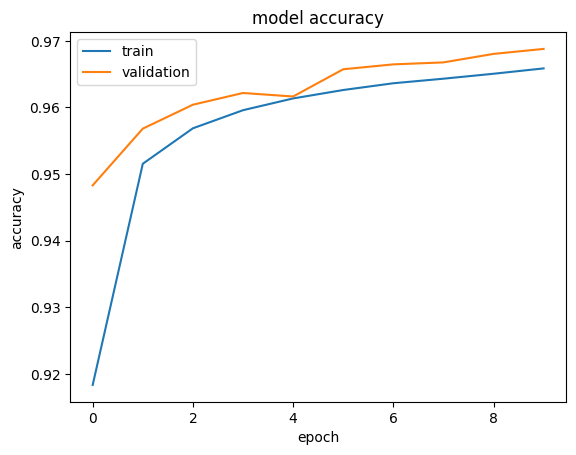

In [33]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

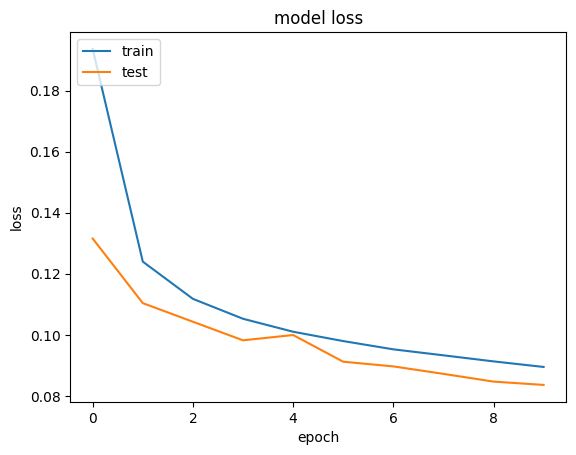

In [34]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
import numpy as np
from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

labels_pred = model.predict(x_train)
labels_pred = np.round(labels_pred.flatten())
accuracy = accuracy_score(y_train, labels_pred)
print("Accuracy: %.2f%%" % (accuracy*100))

19508/19508 [==============================] - 141s 7ms/step
Accuracy: 96.88%


In [38]:
print(classification_report(y_train, labels_pred, digits=5))

              precision    recall  f1-score   support

           0    0.96810   0.97160   0.96985    322538
           1    0.96952   0.96578   0.96765    301703

    accuracy                        0.96879    624241
   macro avg    0.96881   0.96869   0.96875    624241
weighted avg    0.96879   0.96879   0.96878    624241



In [39]:
import tensorflow as tf
import numpy as np
    
model = tf.keras.models.load_model('../../models/gender-bi-lstm-base.h5')

def name_to_vector(name):
    sequence = name_to_sequence(name)
    vector = tf.keras.preprocessing.sequence.pad_sequences([sequence], maxlen=29, padding='post')[0]
    return vector

def name_to_sequence(name):
    char_to_int = dict((c, i) for i, c in enumerate('abcdefghijklmnopqrstuvwxyz '))
    sequence = [char_to_int[char.lower()] for char in name if char.lower() in char_to_int]
    return sequence
    
def predict_gender(name):
    name_vector = np.array(name_to_vector(name))
    padded_name_vector = tf.keras.preprocessing.sequence.pad_sequences([name_vector], maxlen=29, padding='post', truncating='post')
    prediction = model.predict(padded_name_vector)
    
    if prediction < 0.5:
        return 'Male'
    else:
        return 'Female'

nama = [
  'Novi Gustiana', 
  'Novia Kumala Sari', 
  'Novianto Rahmadi', 
  'Padli Nofrizal', 
  'Putri Wahyuni', 
  'Rahmat Hidayat', 
  'Rahmi Andreni', 
  'Rian Aries Fani', 
  'Riandi Selvi', 
  'Rianto', 
  'Ridha Ulva', 
  'Rizqi Wahyuningsih', 
  'Ruwadi Saputra', 
  'Sugeng Hermawan', 
  'Suliatun', 
  'Tomi Ismeidianto', 
  'Usthalay Putra', 
  'Winggo Aga Septian', 
  'Yunaldi Rizki Putra', 
  'Arif fasetyo', 
  'Arie Rahman Satria', 
  'Arinda Oktaviana', 
  'Melani', 
  'Malik', 
  'Melani Malik'
]

for i in nama:
    print(i + ' = ' + predict_gender(i))

1/1 [==============================] - 1s 1s/step
Novi Gustiana = Female
1/1 [==============================] - 0s 26ms/step
Novia Kumala Sari = Female
1/1 [==============================] - 0s 26ms/step
Novianto Rahmadi = Male
1/1 [==============================] - 0s 27ms/step
Padli Nofrizal = Male
1/1 [==============================] - 0s 20ms/step
Putri Wahyuni = Female
1/1 [==============================] - 0s 19ms/step
Rahmat Hidayat = Male
1/1 [==============================] - 0s 22ms/step
Rahmi Andreni = Female
1/1 [==============================] - 0s 19ms/step
Rian Aries Fani = Male
1/1 [==============================] - 0s 20ms/step
Riandi Selvi = Female
1/1 [==============================] - 0s 19ms/step
Rianto = Male
1/1 [==============================] - 0s 19ms/step
Ridha Ulva = Female
1/1 [==============================] - 0s 20ms/step
Rizqi Wahyuningsih = Female
1/1 [==============================] - 0s 21ms/step
Ruwadi Saputra = Male
1/1 [============================